In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import preprocessor as p

from IPython import display
from textblob import TextBlob
import pickle

%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
handles = pd.read_csv("statsocial_political_journalists.csv")['Username']

In [3]:
import requests
from requests_oauthlib import OAuth1

#OAuth ~ simple way to to publish & interact with data

In [4]:
# Importing our Config

# import cnfg
import os
# config = cnfg.load(".twitter_config")

oauth = OAuth1(os.environ['TWITTER_API_KEY'],
               os.environ["TWITTER_API_SECRET"],
               os.environ["TWITTER_ACCESS_TOKEN"],
               os.environ["TWITTER_ACCESS_TOKEN_SECRET"])

In [5]:
# This "user_timeline" url tells the API to get the tweets of the user associated with the app.
response = requests.get("https://api.twitter.com/1.1/statuses/user_timeline.json",
                        auth=oauth)

# Note that we're using the "requests" library
tweets = response.json()

In [6]:
# encoding: utf-8

import tweepy #https://github.com/tweepy/tweepy
import csv

def get_all_tweets(screen_name):
    #Twitter only allows access to a users most recent 3240 tweets with this method
    
    #authorize twitter, initialize tweepy
    auth = tweepy.OAuthHandler(os.environ['TWITTER_API_KEY'],
                           os.environ["TWITTER_API_SECRET"])
    auth.set_access_token(os.environ["TWITTER_ACCESS_TOKEN"],
                          os.environ["TWITTER_ACCESS_TOKEN_SECRET"])
    api=tweepy.API(auth)
    
    #initialize a list to hold all the tweepy Tweets
    alltweets = []
    
    #make initial request for most recent tweets (200 is the maximum allowed count)
    new_tweets = api.user_timeline(screen_name = screen_name,count=200)
    
    #save most recent tweets
    alltweets.extend(new_tweets)
    
    #save the id of the oldest tweet less one
    oldest = alltweets[-1].id - 1

    #keep grabbing tweets until there are no tweets left to grab
    while len(new_tweets) > 0:
        print("getting tweets before %s" % (oldest))

        #all subsiquent requests use the max_id param to prevent duplicates
        new_tweets = api.user_timeline(screen_name = screen_name,count=200,max_id=oldest)

        #save most recent tweets
        alltweets.extend(new_tweets)

        #update the id of the oldest tweet less one
        oldest = alltweets[-1].id - 1

        print("...%s tweets downloaded so far" % (len(alltweets)))

    #transform the tweepy tweets into a 2D array that will populate the csv	
    outtweets = [[tweet.id_str, tweet.created_at, p.clean(tweet.text)] for tweet in alltweets]

    #write the csv
    with open('tweets/%s_tweets.csv' % screen_name, 'w') as f:
        writer = csv.writer(f)
        writer.writerow(["id","created_at","text"])
        writer.writerows(outtweets)

    pass

In [7]:
import os
cwd = os.getcwd()
cwd

'/Users/jeremy/ds/metis/metisgh/chi17_ds2/student_submissions/projects/Fletcher'

In [12]:
i = 198
for handle in handles[i-1:]:
    print(handle, ' ',i,'/',len(handles))
    try:
        get_all_tweets(handle)
        handles.remove(handle)
    except tweepy.TweepError:
        time.sleep(60 * 15)
        continue 
    except:
        print("(╯°□°）╯︵ ┻━┻")
    i+=1
    display.clear_output(wait=True)
    time.sleep(5)

KeyboardInterrupt: 

In [93]:
nate = string(list(pd.read_csv("tweets/NateSilver538_tweets.csv")['text']))

In [39]:
nate[0]

'…this seems like an unhealthy attitude, given how wrong the conventional wisdom was in Brexit and how it underestimated uncertainty.'

In [89]:
def string(lst):
    index = 0
    temp_lst = []
    for _ in range(len(lst)):
        temp_lst.append(str(lst[index]))
        index +=1
    return(temp_lst)

In [33]:
def sentiment_plot(tweet_history):
    polarity = np.zeros(len(tweet_history))
    subjectivity = np.zeros(len(tweet_history))

    for tweet in range(len(tweet_history)):
        polarity[tweet] = TextBlob(tweet_history[tweet]).sentiment.polarity
        subjectivity[tweet] = TextBlob(tweet_history[tweet]).sentiment.subjectivity

    print('µ polarity: ',np.mean(polarity).round(2),' σ polarity: ',np.std(polarity).round(2),' µ subjectivity: ',np.mean(subjectivity).round(2),' σ subjectivity: ',np.std(subjectivity).round(2))
    plt.figure(figsize=(12,8))
    plt.plot(polarity, subjectivity, "o", alpha =.2)
    plt.xlabel("polarity")
    plt.ylabel("subjectivity")

In [60]:
def sentiment_dist(tweet_history):
    polarity = np.zeros(len(tweet_history))
    subjectivity = np.zeros(len(tweet_history))

    for tweet in range(len(tweet_history)):
        polarity[tweet] = TextBlob(tweet_history[tweet]).sentiment.polarity
        subjectivity[tweet] = TextBlob(tweet_history[tweet]).sentiment.subjectivity
    return (np.mean(polarity),np.std(polarity),np.mean(subjectivity),np.std(subjectivity))

µ polarity:  0.15  σ polarity:  0.29  µ subjectivity:  0.38  σ subjectivity:  0.33


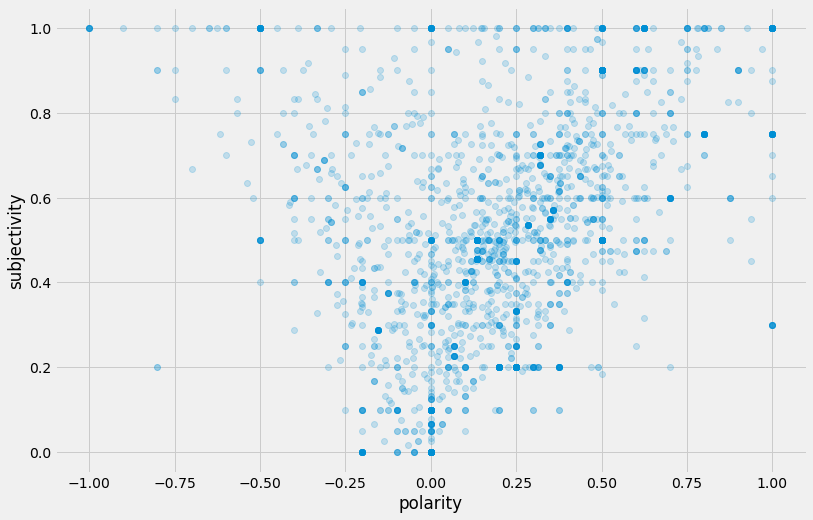

In [101]:
sentiment_plot(string(list(pd.read_csv("tweets/andersoncooper_tweets.csv")['text'])))

µ polarity:  0.07  σ polarity:  0.26  µ subjectivity:  0.32  σ subjectivity:  0.33


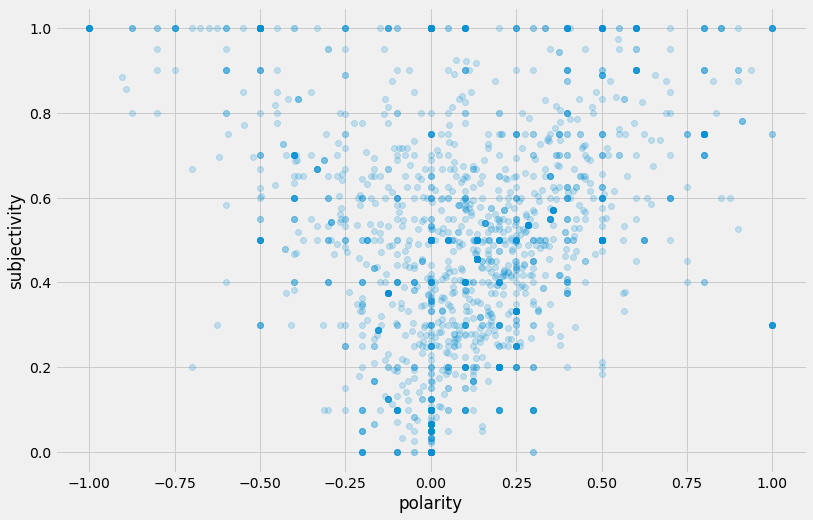

In [102]:
sentiment_plot(string(list(pd.read_csv("tweets/maddow_tweets.csv")['text'])))

µ polarity:  0.11  σ polarity:  0.29  µ subjectivity:  0.36  σ subjectivity:  0.32


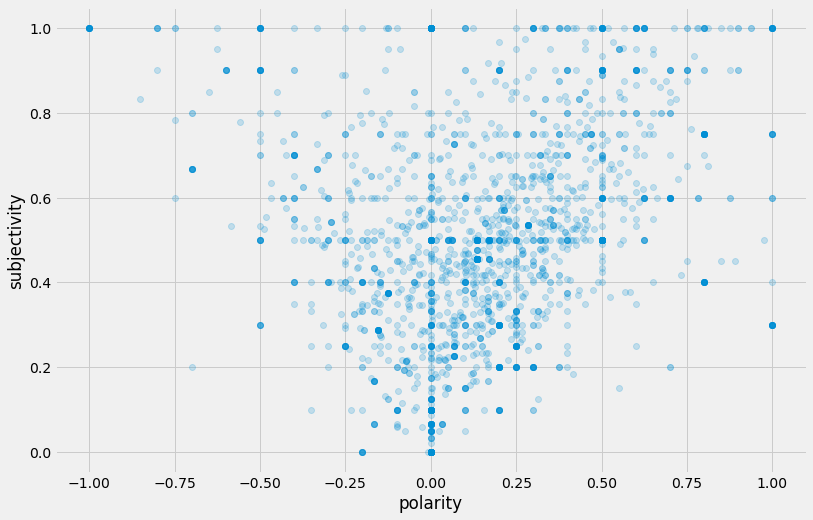

In [103]:
sentiment_plot(string(list(pd.read_csv("tweets/megynkelly_tweets.csv")['text'])))

µ polarity:  0.07  σ polarity:  0.28  µ subjectivity:  0.31  σ subjectivity:  0.33


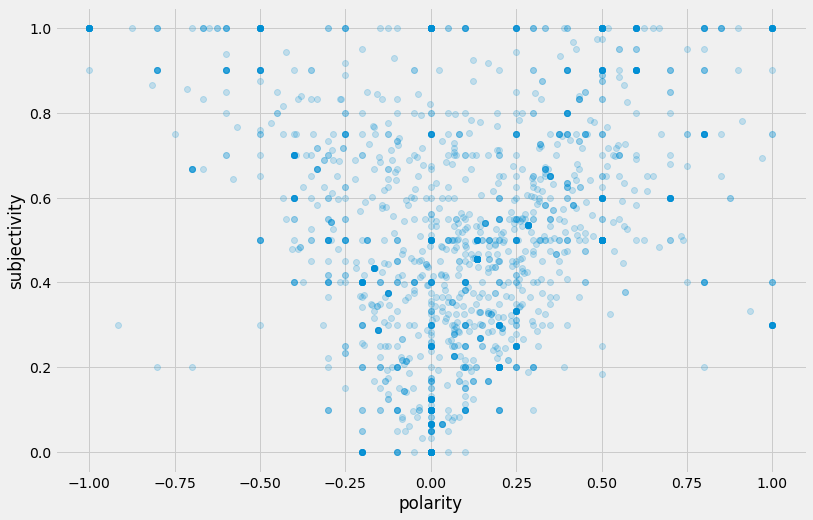

In [104]:
sentiment_plot(string(list(pd.read_csv("tweets/glennbeck_tweets.csv")['text'])))

µ polarity:  0.08  σ polarity:  0.23  µ subjectivity:  0.33  σ subjectivity:  0.29


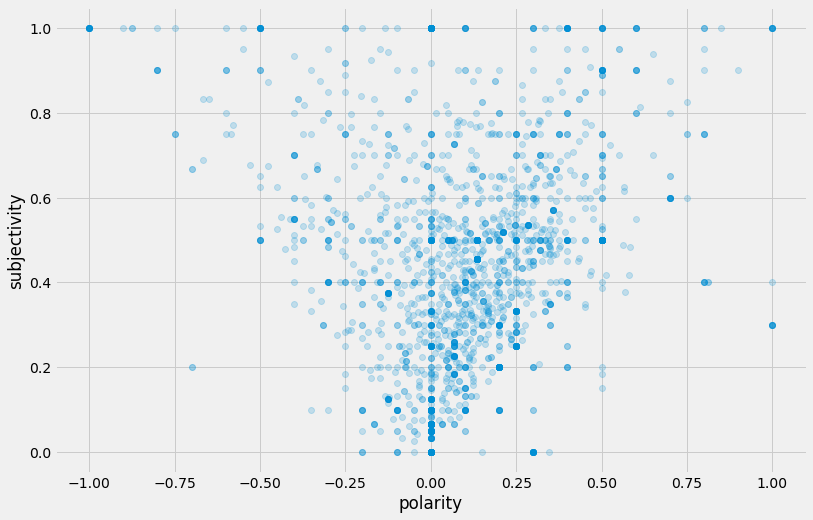

In [105]:
sentiment_plot(string(list(pd.read_csv("tweets/RBReich_tweets.csv")['text'])))